In [1]:
import os

dir = './problematic_samples/cropped/'
image_files = [dir + file_name for file_name in os.listdir(dir)]
image_files.sort()

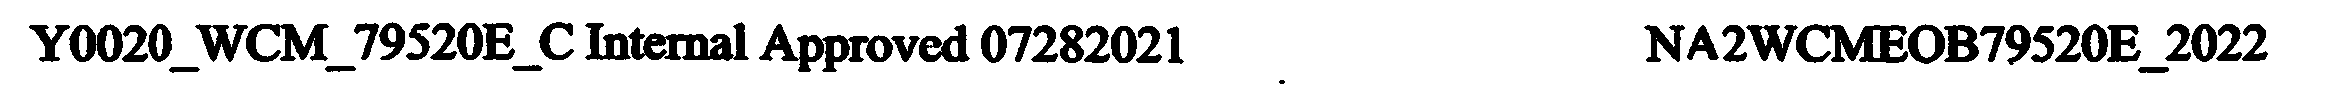

C001592550-00-bottom_cropped.png


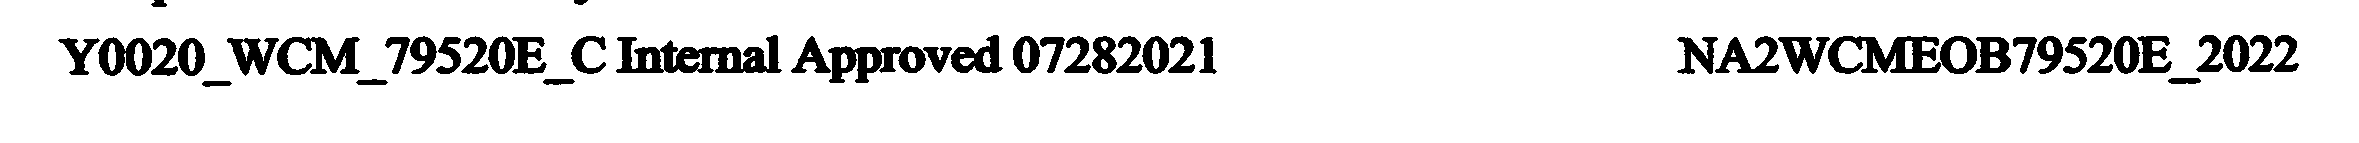

C001592551-00-bottom_cropped.png


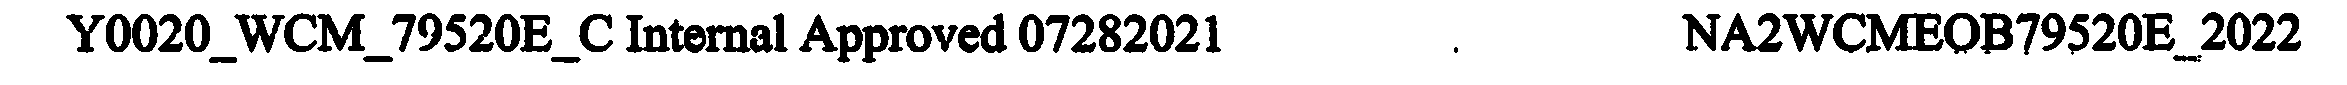

C001592552-00-bottom_cropped.png


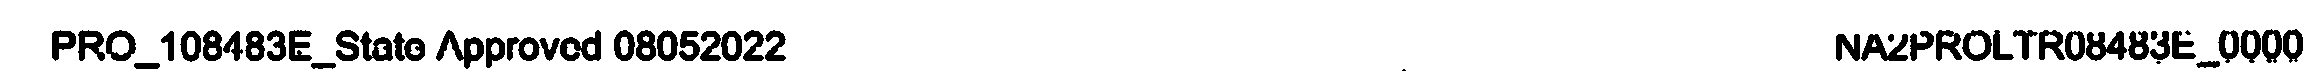

C001592553-00-bottom_cropped.png


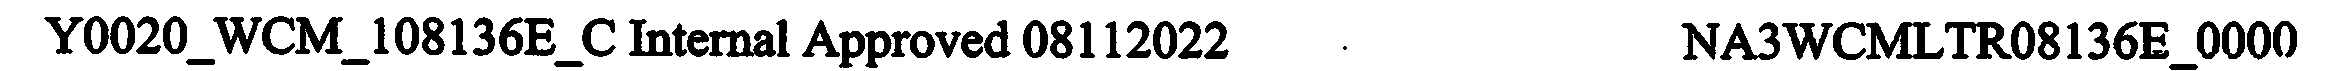

C001592555-00-bottom_cropped.png


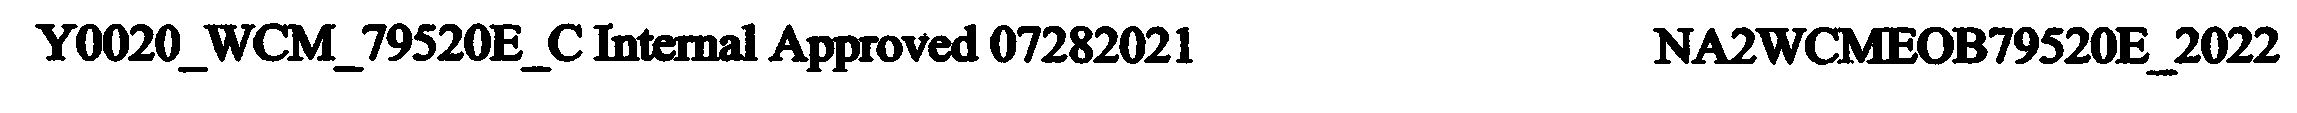

C001592556-00-bottom_cropped.png


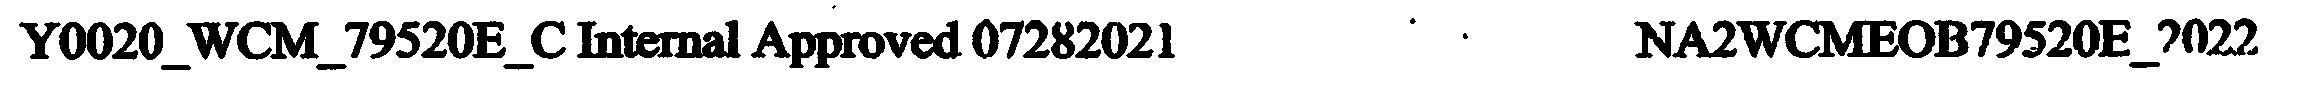

C001592557-00-bottom_cropped.png


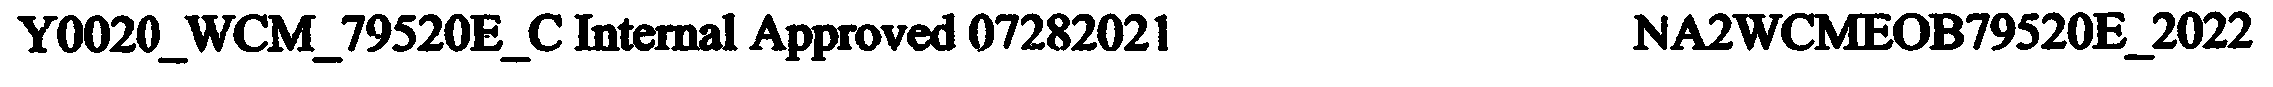

C001592558-00-bottom_cropped.png


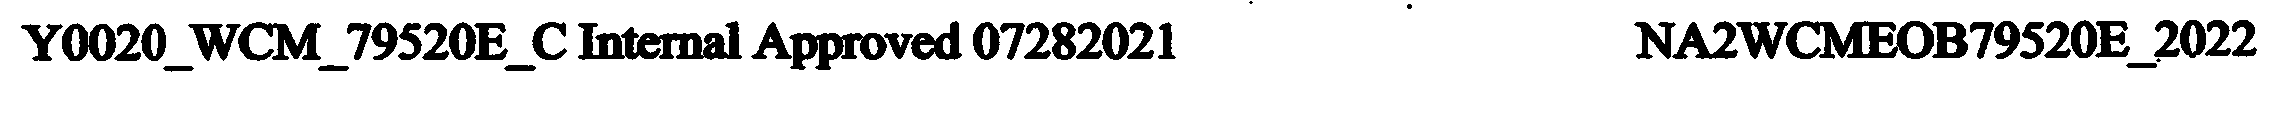

C001592559-00-bottom_cropped.png


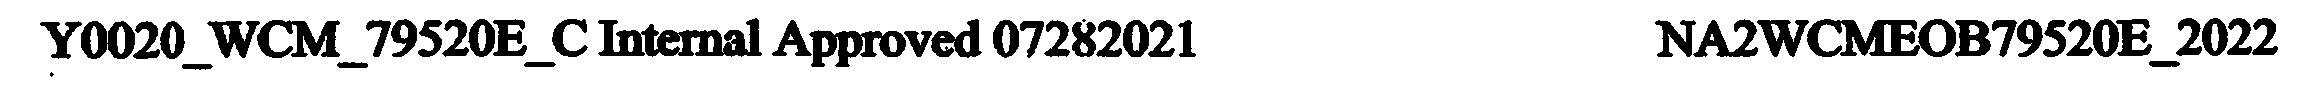

C001592560-00-bottom_cropped.png


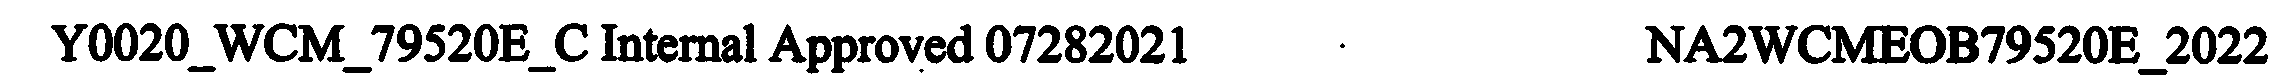

C001604815-00-bottom_cropped.png


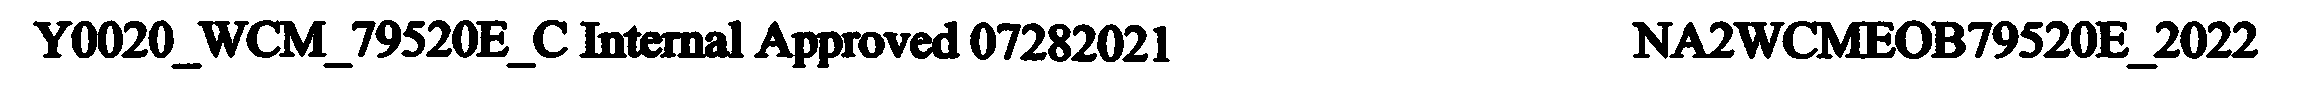

C001604816-00-bottom_cropped.png


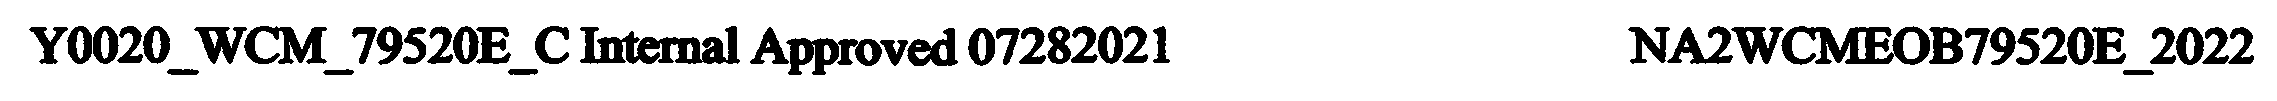

C001604817-00-bottom_cropped.png


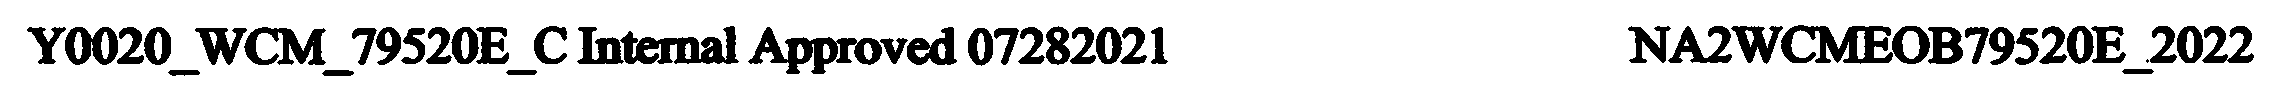

C001604819-00-bottom_cropped.png


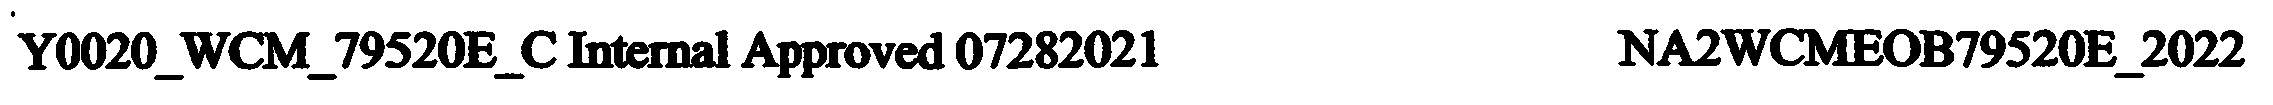

C001604820-00-bottom_cropped.png


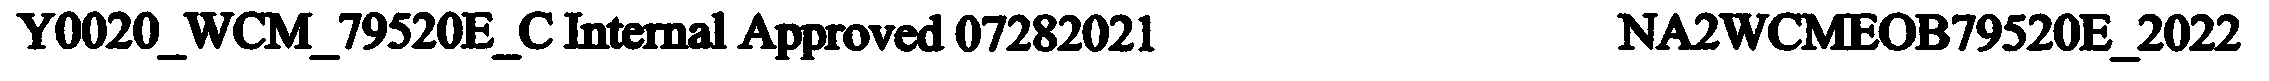

C001604821-00-bottom_cropped.png


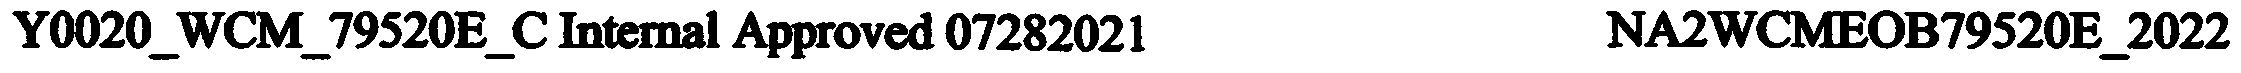

C001604822-00-bottom_cropped.png


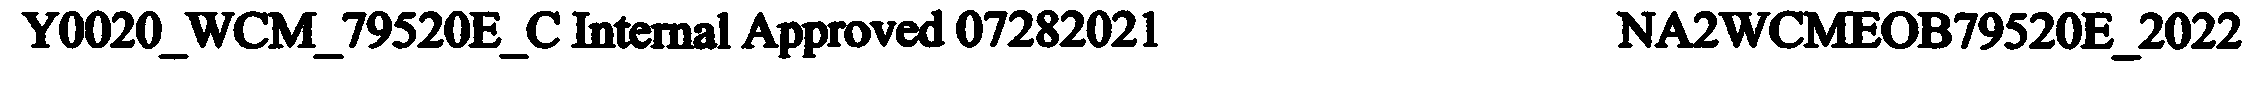

C001604823-00-bottom_cropped.png


['problematic_samples/tif-samples-smoothened/C001604815-00-bottom_cropped_smooth.jpg',
 'problematic_samples/tif-samples-smoothened/C001592555-00-bottom_cropped_smooth.jpg',
 'problematic_samples/tif-samples-smoothened/C001592558-00-bottom_cropped_smooth.jpg',
 'problematic_samples/tif-samples-smoothened/C001592556-00-bottom_cropped_smooth.jpg',
 'problematic_samples/tif-samples-smoothened/C001604816-00-bottom_cropped_smooth.jpg',
 'problematic_samples/tif-samples-smoothened/C001592550-00-bottom_cropped_smooth.jpg',
 'problematic_samples/tif-samples-smoothened/C001604821-00-bottom_cropped_smooth.jpg',
 'problematic_samples/tif-samples-smoothened/C001604822-00-bottom_cropped_smooth.jpg',
 'problematic_samples/tif-samples-smoothened/C001592553-00-bottom_cropped_smooth.jpg',
 'problematic_samples/tif-samples-smoothened/C001604823-00-bottom_cropped_smooth.jpg',
 'problematic_samples/tif-samples-smoothened/C001592552-00-bottom_cropped_smooth.jpg',
 'problematic_samples/tif-samples-smoothene

In [53]:
from wand.image import Image

def image_morphology(image_filename, dir):
    with Image(filename=image_filename) as img:
        with img.clone() as img_copy:
            # Trying to replicate the following command:
            # -type Grayscale
            img_copy.type = "grayscale"
            # -negate
            img_copy.negate()
            # -define morphology:compose=darken
            img_copy.artifacts["morphology:compose"] = "Darken"
            # -morphology Thinning 'Rectangle:1x80+0+0<'
            img_copy.morphology(method="dilate", kernel="Diamond:1.0")
            # -negate
            img_copy.negate()
            display(img_copy)
            image_filename = image_filename.split("/")[-1]
            print(image_filename)
            # smmoothen_filename = f"{image_filename[:-4]}_smooth{image_filename[-4:]}"
            smmoothen_filename = f"{image_filename[:-4]}_smooth.jpg"
            # print(smmoothen_filename)
            img_copy.save(filename=dir + smmoothen_filename)

dir_smooth = "problematic_samples/tif-samples-smoothened/"
for image_file in image_files:
    image_morphology(image_file, dir_smooth)

smoothened_image_files = [dir_smooth + file_name for file_name in os.listdir("./" + dir_smooth)]
smoothened_image_files
 

In [ ]:
import matplotlib.pyplot as plt
import keras_ocr

pipeline = keras_ocr.pipeline.Pipeline()

images = [keras_ocr.tools.read(url) for url in smoothened_image_files]


# Each list of predictions in prediction_groups is a list of
# (word, box) tuples.
prediction_groups = pipeline.recognize(
    images,
    detection_kwargs={"detection_threshold": 0.95, "text_threshold": 0.5},
)

# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 10 * len(images)))
for ax, image, predictions in zip(axs, images, prediction_groups):
    keras_ocr.tools.drawAnnotations(image=image, predictions=predictions, ax=ax)

In [52]:
from PIL import Image as PIL_IMAGE
import pytesseract

pytesseract.pytesseract.tesseract_cmd = '/usr/local/bin/tesseract'
output = []
for f in smoothened_image_files:
    text = pytesseract.image_to_string(PIL_IMAGE.open(f))
    file_name = f.split('/')[-1]
    output.append(f'{file_name}:\n\n{text}\n')

with open('output.txt', 'w') as f: 
    f.write(f'\n**************************************************************************\n'.join(output))

In [3]:
import easyocr
reader = easyocr.Reader(['en']) # this needs to run only once to load the model into memory


In [5]:
# output = []
# for f in smoothened_image_files:
#     text = reader.readtext(f'./{f}')
#     file_name = f.split('/')[-1]
#     output.append(f'{file_name}:\n\n{text}\n')

# with open('output.txt', 'w') as f: 
#     f.write(f'\n**************************************************************************\n'.join(output))

result = reader.readtext('./problematic_samples/C001604823-00-bottom_smooth_cropped.jpg')
result

[([[16, 4], [1166, 4], [1166, 69], [16, 69]],
  'Y002O_WCM_79S20E_C Intemal Approved 07282021',
  0.5170319807100583),
 ([[1608, 5], [2249, 5], [2249, 67], [1608, 67]],
  'NAZWCMEOB79S20E2022',
  0.42178101874143575)]